# Problem Statement-1

- Perform NLP – Topic Modelling and Text Summarization by following all the steps as mentioned below.
- Data Cleaning using regular expressions, Countvectorizer, POS Tagging, NER, Topic Modelling (LDA, LSA) and Text Summarization.

Hint: - Use Data.csv file given in hands-on material.


Lets load necessary libraries

In [1]:
import re
import pandas as pd
import nltk
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
nltk.download('stopwords')
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from heapq import nlargest

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jaich\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We will summarize our text

In [3]:
df = pd.read_csv('Data.csv', usecols=['text'])

df.head()

,text
0,What @dhepburn said.
1,plus you've added commercials to the experienc...
2,I didn't today... Must mean I need to take ano...
3,"it's really aggressive to blast obnoxious ""ent..."
4,and it's a really big bad thing about it


Lets Clean our data

In [4]:
HANDLE = '@\w+'
LINK = 'https?://t\.co/\w+'
SPECIAL_CHARS = '&lt;|&lt;|&amp;|#'

In [5]:
def clean(text):
    text = re.sub(HANDLE, ' ', text)
    text = re.sub(LINK, ' ', text)
    text = re.sub(SPECIAL_CHARS, ' ', text)
    return text

In [6]:
df['text'] = df.text.apply(clean)
df.head(10)

,text
0,What said.
1,plus you've added commercials to the experienc...
2,I didn't today... Must mean I need to take ano...
3,"it's really aggressive to blast obnoxious ""ent..."
4,and it's a really big bad thing about it
5,seriously would pay $30 a flight for seats tha...
6,"yes, nearly every time I fly VX this __ar worm..."
7,Really missed a prime opportunity for Men With...
8,"Well, I didn't_but NOW I DO! :-D"
9,"it was amazing, and arrived an hour early. You..."


### LDA

In [7]:
from gensim.parsing.preprocessing import preprocess_string

In [8]:
tweets = df.text.apply(preprocess_string).tolist()
tweets

[['said'],
 ['plu', 'ad', 'commerci', 'experi', 'tacki'],
 ['todai', 'mean', 'need', 'trip'],
 ['aggress',
  'blast',
  'obnoxi',
  'entertain',
  'guest',
  'face',
  'littl',
  'recours'],
 ['big', 'bad', 'thing'],
 ['serious', 'pai', 'flight', 'seat', 'plai', 'bad', 'thing', 'fly'],
 ['ye', 'nearli', 'time', 'fly', 'worm', 'won', 'awai'],
 ['miss', 'prime', 'opportun', 'men', 'hat', 'parodi'],
 [],
 ['amaz', 'arriv', 'hour', 'earli', 'good'],
 ['know', 'suicid', 'second', 'lead', 'caus', 'death', 'teen'],
 ['pretti', 'graphic', 'better', 'minim', 'iconographi'],
 ['great', 'deal', 'think', 'trip', 'haven', 'gone', 'trip'],
 ['fly', 'fabul', 'seduct', 'ski', 'stress', 'awai', 'travel'],
 ['thank'],
 ['sfo', 'pdx', 'schedul', 'mia'],
 ['excit',
  'cross',
  'countri',
  'flight',
  'lax',
  'mco',
  'heard',
  'great',
  'thing',
  'virgin',
  'america',
  'daystogo'],
 ['flew',
  'nyc',
  'sfo',
  'week',
  'couldn',
  'fulli',
  'sit',
  'seat',
  'larg',
  'gentleman',
  'help'],
 

In [9]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel

In [10]:
dictionary = corpora.Dictionary(tweets)
corpus = [dictionary.doc2bow(text) for text in tweets]

In [12]:
NUM_TOPICS = 5
ldamodel = LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=10)
ldamodel.print_topics(num_words=5)

[(0,
  '0.041*"servic" + 0.039*"custom" + 0.017*"help" + 0.016*"phone" + 0.012*"call"'),
 (1,
  '0.121*"flight" + 0.033*"cancel" + 0.032*"hour" + 0.022*"delai" + 0.021*"wait"'),
 (2,
  '0.089*"thank" + 0.024*"gui" + 0.017*"great" + 0.012*"right" + 0.012*"good"'),
 (3,
  '0.033*"seat" + 0.026*"ticket" + 0.018*"need" + 0.011*"mile" + 0.011*"chang"'),
 (4,
  '0.027*"airlin" + 0.015*"fly" + 0.014*"bag" + 0.013*"flt" + 0.011*"flight"')]

In [13]:
from gensim.models.coherencemodel import CoherenceModel

In [17]:
def calculate_coherence_score(documents, dictionary, model):
    coherence_model = CoherenceModel(model=model, texts=documents, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

In [18]:
def get_coherence_values(start, stop):
    for num_topics in range(start, stop):
        print(f'\nCalculating coherence for {num_topics} topics')
        ldamodel = LdaModel(corpus, num_topics = num_topics, id2word=dictionary, passes=2)
        coherence = calculate_coherence_score(tweets, dictionary, ldamodel)
        yield coherence

In [19]:
min_topics, max_topics = 10,16
coherence_score = list(get_coherence_values(min_topics,max_topics))


Calculating coherence for 10 topics

Calculating coherence for 11 topics

Calculating coherence for 12 topics

Calculating coherence for 13 topics

Calculating coherence for 14 topics

Calculating coherence for 15 topics


Text(0.5, 1.0, 'Coherence Scores')

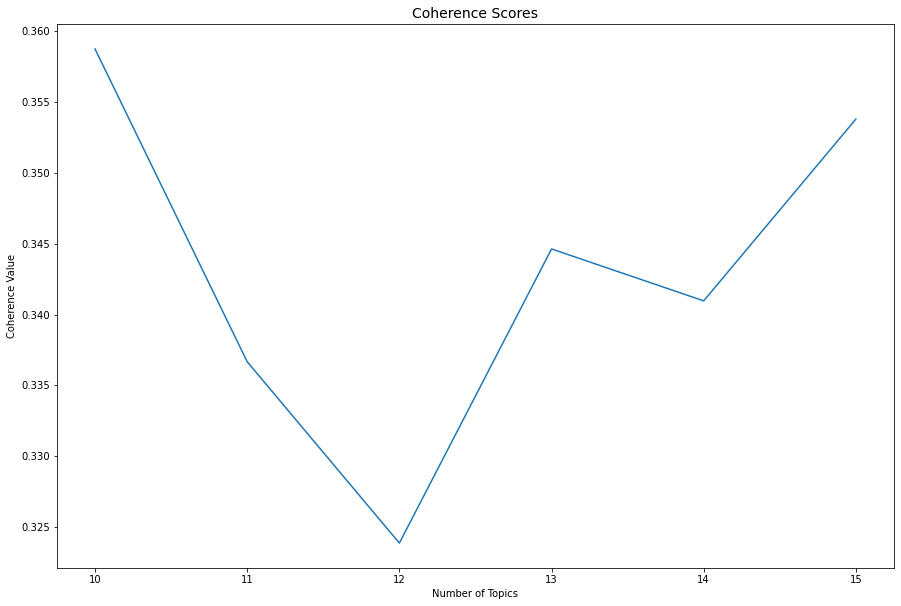

In [21]:
# Plotting our coherence Score
import matplotlib.pyplot as plt
x = [int(i) for i in range(min_topics, max_topics)]

ax = plt.figure(figsize=(15,10))
plt.xticks(x)
plt.plot(x, coherence_score)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Value")
plt.title("Coherence Scores", fontsize = 14)